<a href="https://colab.research.google.com/github/naveen-kumar-123/book-price-prediction/blob/master/book_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [ ]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neevaN_Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


# exploring the data

In [ ]:
# checking for duplicate rows
train_data.duplicated().sum()

0

In [ ]:
# see some rows
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition             Reviews              Ratings  \
0  Paperback,– 10 Mar 2016  4.0 out of 5 stars   8 customer reviews   
1   Paperback,– 7 Nov 2012  3.9 out of 5 stars  14 customer reviews   
2  Paperback,– 25 Feb 1982  4.8 out of 5 stars   6 customer reviews   
3   Paperback,– 5 Oct 2017  4.1 out of 5 stars  13 customer reviews   
4  Hardcover,– 10 Oct 2006  5.0 out of 5 stars    1 customer review   

                                            Synopsis  \
0  THE HUNTERS return in their third brilliant no...   
1  A layered portrait of a troubled genius for wh...   
2  "During the time men live without a common Pow...   
3  A handful of grain is found in the pocket of a...   
4  For seven decades, "Life" has been thrilling t...   

                          Genre                          BookCategory   Price  
0    Action & Adventure (Books)                    Action & Adventure  220.00  
1    Cinema & Broadcast (Books)  Biographies, Diaries & True Accounts  202.93  
2       International Relations                                Humour  299.00  
3  Contemporary Fiction (Books)             Crime, Thriller & Mystery  180.00  
4         Photography Textbooks              Arts, Film & Photography  965.62

In [ ]:
# check the unique observations in each column
train_data.nunique()

Title           5568
Author          3679
Edition         3370
Reviews           36
Ratings          342
Synopsis        5549
Genre            345
BookCategory      11
Price           1614
dtype: int64

In [ ]:
# checking for nulls
train_data.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

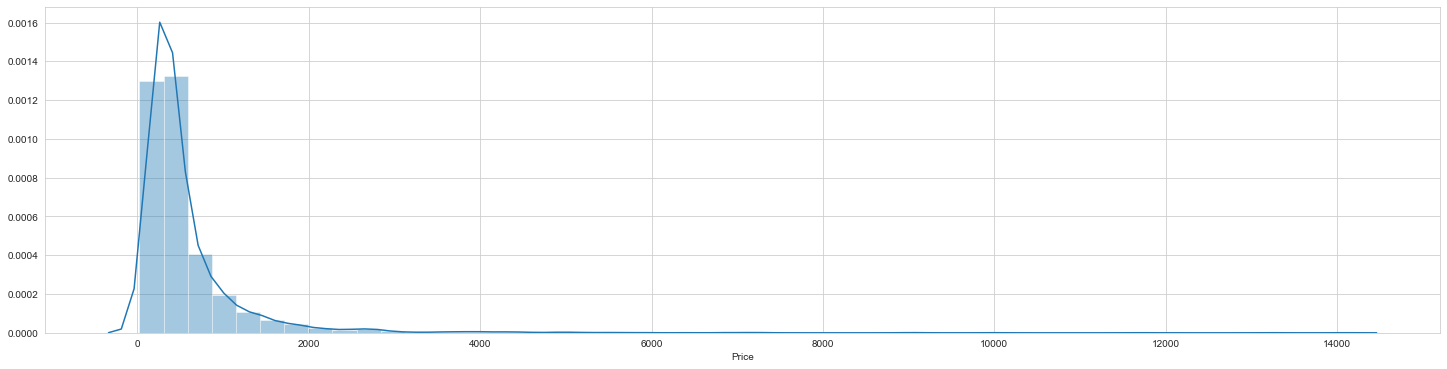

In [ ]:
# let's see the distribution of our target column, that is "Price"
plt.figure(figsize=(25, 6))
sns.set_style('whitegrid')
sns.distplot(train_data.loc[:,'Price'])

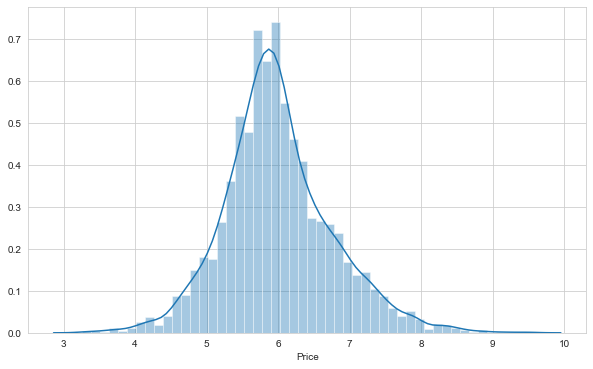

In [ ]:
# let's see the distribution of our target column, that is "Price"
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.distplot(np.log1p(train_data.loc[:,'Price']))

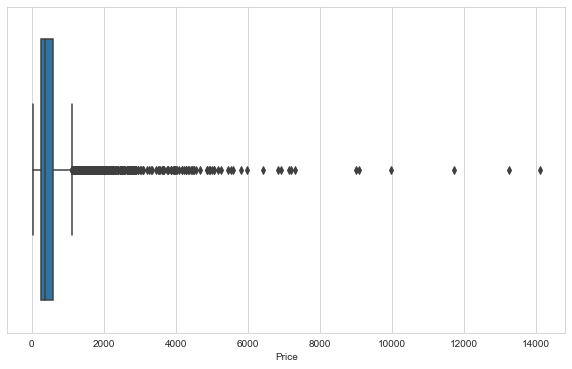

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(train_data.loc[:,'Price'])

# Data Pre-Processing

## cleaning some columns

In [ ]:
train_data.loc[:10,"Title"]

0                   The Prisoner's Gold (The Hunters 3)
1                    Guru Dutt: A Tragedy in Three Acts
2                          Leviathan (Penguin Classics)
3                    A Pocket Full of Rye (Miss Marple)
4            LIFE 70 Years of Extraordinary Photography
5     ChiRunning: A Revolutionary Approach to Effort...
6                            Death on the Nile (Poirot)
7     Yoga Your Home Practice Companion: A Complete ...
8               Karmayogi: A Biography of E. Sreedharan
9            The Iron King (The Accursed Kings, Book 1)
10    Battle for Sanskrit: Is Sanskrit Political or ...
Name: Title, dtype: object

In [ ]:
train_data.loc[:, "Title_1"] = train_data.loc[:, "Title"].str.extract(r"\((.*?)\)", expand=False)
train_data.loc[:, "Title_1"] = train_data.loc[:, "Title_1"].fillna('missing_title')

In [ ]:
train_data.loc[:,'Title_1'].value_counts()

missing_title                     4541
Penguin Classics                    45
Poirot                              28
Penguin Modern Classics             26
Campfire Graphic Novels             25
                                  ... 
Inspector Rebus S.                   1
Disha                                1
and Doesn't Work                     1
Wordsworth Children's Classics       1
Language Learning                    1
Name: Title_1, Length: 938, dtype: int64

In [ ]:
train_data.loc[:10, "Genre"]

0                Action & Adventure (Books)
1                Cinema & Broadcast (Books)
2                   International Relations
3              Contemporary Fiction (Books)
4                     Photography Textbooks
5         Healthy Living & Wellness (Books)
6         Crime, Thriller & Mystery (Books)
7        Sports Training & Coaching (Books)
8     Biographies & Autobiographies (Books)
9                Action & Adventure (Books)
10                            Asian History
Name: Genre, dtype: object

In [ ]:
train_data.loc[:, "Genre"] = train_data.loc[:, "Genre"].str.replace(r"\(.*\)", "")
train_data.loc[:10, "Genre"]

0                Action & Adventure 
1                Cinema & Broadcast 
2            International Relations
3              Contemporary Fiction 
4              Photography Textbooks
5         Healthy Living & Wellness 
6         Crime, Thriller & Mystery 
7        Sports Training & Coaching 
8     Biographies & Autobiographies 
9                Action & Adventure 
10                     Asian History
Name: Genre, dtype: object

In [ ]:
train_data.loc[:10,'Reviews']

0     4.0 out of 5 stars
1     3.9 out of 5 stars
2     4.8 out of 5 stars
3     4.1 out of 5 stars
4     5.0 out of 5 stars
5     4.5 out of 5 stars
6     4.4 out of 5 stars
7     4.7 out of 5 stars
8     4.2 out of 5 stars
9     4.0 out of 5 stars
10    4.9 out of 5 stars
Name: Reviews, dtype: object

In [ ]:
pd.set_option('display.max_rows', 10_000)

In [ ]:
train_data.loc[:,'Reviews']

0       4.0 out of 5 stars
1       3.9 out of 5 stars
2       4.8 out of 5 stars
3       4.1 out of 5 stars
4       5.0 out of 5 stars
5       4.5 out of 5 stars
6       4.4 out of 5 stars
7       4.7 out of 5 stars
8       4.2 out of 5 stars
9       4.0 out of 5 stars
10      4.9 out of 5 stars
11      3.5 out of 5 stars
12      4.1 out of 5 stars
13      5.0 out of 5 stars
14      3.8 out of 5 stars
15      5.0 out of 5 stars
16      5.0 out of 5 stars
17      4.9 out of 5 stars
18      4.5 out of 5 stars
19      4.3 out of 5 stars
20      4.9 out of 5 stars
21      5.0 out of 5 stars
22      3.1 out of 5 stars
23      3.1 out of 5 stars
24      4.8 out of 5 stars
25      4.0 out of 5 stars
26      4.3 out of 5 stars
27      4.3 out of 5 stars
28      5.0 out of 5 stars
29      5.0 out of 5 stars
30      4.0 out of 5 stars
31      3.9 out of 5 stars
32      4.4 out of 5 stars
33      4.2 out of 5 stars
34      4.3 out of 5 stars
35      4.3 out of 5 stars
36      4.4 out of 5 stars
3

In [ ]:
train_data.loc[:,'Reviews'] = train_data.loc[:,'Reviews'].str.replace(r",", "")
# since all the reviews are out of 5 stars, let's extract only the rated stars
train_data.loc[:,'Reviews'] = train_data.loc[:,'Reviews'].str.split().str.get(0).astype(float)
train_data.loc[:,'Reviews']

0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
5       4.5
6       4.4
7       4.7
8       4.2
9       4.0
10      4.9
11      3.5
12      4.1
13      5.0
14      3.8
15      5.0
16      5.0
17      4.9
18      4.5
19      4.3
20      4.9
21      5.0
22      3.1
23      3.1
24      4.8
25      4.0
26      4.3
27      4.3
28      5.0
29      5.0
30      4.0
31      3.9
32      4.4
33      4.2
34      4.3
35      4.3
36      4.4
37      3.9
38      5.0
39      4.6
40      5.0
41      4.7
42      3.8
43      4.5
44      4.6
45      5.0
46      5.0
47      4.1
48      4.8
49      4.8
50      3.8
51      4.4
52      2.0
53      4.6
54      5.0
55      5.0
56      4.2
57      4.1
58      4.7
59      4.1
60      5.0
61      3.7
62      4.0
63      3.2
64      4.0
65      4.0
66      4.7
67      5.0
68      4.3
69      5.0
70      4.0
71      5.0
72      4.1
73      5.0
74      4.6
75      3.7
76      5.0
77      4.1
78      4.4
79      4.0
80      5.0
81      4.6
82      5.0
83  

In [ ]:
train_data.loc[:, 'Ratings']

0           8 customer reviews
1          14 customer reviews
2           6 customer reviews
3          13 customer reviews
4            1 customer review
5           8 customer reviews
6          72 customer reviews
7          16 customer reviews
8         111 customer reviews
9            1 customer review
10        132 customer reviews
11         17 customer reviews
12          4 customer reviews
13          3 customer reviews
14          5 customer reviews
15          2 customer reviews
16           1 customer review
17         23 customer reviews
18         76 customer reviews
19          5 customer reviews
20         10 customer reviews
21          2 customer reviews
22          2 customer reviews
23         10 customer reviews
24          9 customer reviews
25           1 customer review
26         15 customer reviews
27         34 customer reviews
28         17 customer reviews
29          9 customer reviews
30         32 customer reviews
31          2 customer reviews
32      

In [ ]:
train_data.loc[:,'Ratings'] = train_data.loc[:,'Ratings'].str.replace(r",", "")
train_data.loc[:,'Ratings'] = train_data.loc[:, 'Ratings'].str.extract(r"(\d*)", expand=False).astype(float)
train_data.loc[:,'Ratings']

0          8.0
1         14.0
2          6.0
3         13.0
4          1.0
5          8.0
6         72.0
7         16.0
8        111.0
9          1.0
10       132.0
11        17.0
12         4.0
13         3.0
14         5.0
15         2.0
16         1.0
17        23.0
18        76.0
19         5.0
20        10.0
21         2.0
22         2.0
23        10.0
24         9.0
25         1.0
26        15.0
27        34.0
28        17.0
29         9.0
30        32.0
31         2.0
32        49.0
33        49.0
34        10.0
35         8.0
36        62.0
37        61.0
38         1.0
39         8.0
40         7.0
41         5.0
42        18.0
43        16.0
44         6.0
45         3.0
46         2.0
47        98.0
48        12.0
49        14.0
50         3.0
51        97.0
52         1.0
53         7.0
54         2.0
55         2.0
56         7.0
57         5.0
58       285.0
59        29.0
60         1.0
61        27.0
62         4.0
63       267.0
64        24.0
65         7.0
66        

In [ ]:
train_data.loc[:,'BookCategory']

0                         Action & Adventure
1       Biographies, Diaries & True Accounts
2                                     Humour
3                  Crime, Thriller & Mystery
4                   Arts, Film & Photography
5                                     Sports
6                  Crime, Thriller & Mystery
7                                     Sports
8       Biographies, Diaries & True Accounts
9                         Action & Adventure
10           Language, Linguistics & Writing
11       Computing, Internet & Digital Media
12                        Action & Adventure
13                                    Sports
14                                   Romance
15                           Comics & Mangas
16                 Crime, Thriller & Mystery
17                           Comics & Mangas
18      Biographies, Diaries & True Accounts
19       Computing, Internet & Digital Media
20                        Action & Adventure
21                                    Sports
22        

In [ ]:
train_data.loc[:,'BookCategory_1'] = train_data.loc[:,'BookCategory'].str.split(',').str.get(0)
train_data.loc[:,'BookCategory_1']

0       Action & Adventure
1              Biographies
2                   Humour
3                    Crime
4                     Arts
5                   Sports
6                    Crime
7                   Sports
8              Biographies
9       Action & Adventure
10                Language
11               Computing
12      Action & Adventure
13                  Sports
14                 Romance
15         Comics & Mangas
16                   Crime
17         Comics & Mangas
18             Biographies
19               Computing
20      Action & Adventure
21                  Sports
22      Action & Adventure
23               Computing
24                Language
25                Politics
26                  Sports
27         Comics & Mangas
28                  Sports
29             Biographies
30                   Crime
31                  Humour
32             Biographies
33                 Romance
34         Comics & Mangas
35                   Crime
36                Language
3

In [ ]:
train_data.loc[:,'BookCategory_2'] = train_data.loc[:,'BookCategory'].str.split(',').str.get(1)
train_data.loc[:,'BookCategory_2'] = train_data.loc[:,'BookCategory_2'].fillna('missingBookCategory')
train_data.loc[:,'BookCategory_2']

0             missingBookCategory
1         Diaries & True Accounts
2             missingBookCategory
3              Thriller & Mystery
4              Film & Photography
5             missingBookCategory
6              Thriller & Mystery
7             missingBookCategory
8         Diaries & True Accounts
9             missingBookCategory
10          Linguistics & Writing
11       Internet & Digital Media
12            missingBookCategory
13            missingBookCategory
14            missingBookCategory
15            missingBookCategory
16             Thriller & Mystery
17            missingBookCategory
18        Diaries & True Accounts
19       Internet & Digital Media
20            missingBookCategory
21            missingBookCategory
22            missingBookCategory
23       Internet & Digital Media
24          Linguistics & Writing
25            missingBookCategory
26            missingBookCategory
27            missingBookCategory
28            missingBookCategory
29        Diar

In [ ]:
train_data.loc[:, "Edition"]

0                               Paperback,– 10 Mar 2016
1                                Paperback,– 7 Nov 2012
2                               Paperback,– 25 Feb 1982
3                                Paperback,– 5 Oct 2017
4                               Hardcover,– 10 Oct 2006
5                                Paperback,– 5 May 2009
6                                Paperback,– 5 Oct 2017
7                        Hardcover,– Import, 1 Mar 2018
8                               Paperback,– 15 Dec 2015
9                               Paperback,– 26 Mar 2013
10                              Paperback,– 20 Jan 2017
11                      Paperback,– Import, 14 Jun 2018
12                               Paperback,– 1 Jul 1999
13                              Paperback,– 15 Nov 2002
14                               Paperback,– 1 Sep 2011
15                              Paperback,– 26 Feb 2015
16                               Hardcover,– 8 Mar 2018
17                               Paperback,– 1 N

In [ ]:
train_data.loc[:, 'Edition_1'] = train_data.loc[:, 'Edition'].str.split(',').str[0]
train_data.loc[:, 'Edition_1']

0                   Paperback
1                   Paperback
2                   Paperback
3                   Paperback
4                   Hardcover
5                   Paperback
6                   Paperback
7                   Hardcover
8                   Paperback
9                   Paperback
10                  Paperback
11                  Paperback
12                  Paperback
13                  Paperback
14                  Paperback
15                  Paperback
16                  Hardcover
17                  Paperback
18      Mass Market Paperback
19                  Paperback
20                  Hardcover
21                  Paperback
22                  Paperback
23                  Paperback
24                  Paperback
25                  Hardcover
26                  Paperback
27                  Paperback
28                  Hardcover
29                  Paperback
30                  Paperback
31                  Paperback
32                  Paperback
33        

In [ ]:
train_data.loc[:, 'Edition_2'] = train_data.loc[:, 'Edition'].str.split(',').str[1]
train_data.loc[:, 'Edition_2'] = train_data.loc[:, 'Edition_2'].str.replace('– ','')
train_data.loc[:, 'Edition_2']

0                 10 Mar 2016
1                  7 Nov 2012
2                 25 Feb 1982
3                  5 Oct 2017
4                 10 Oct 2006
5                  5 May 2009
6                  5 Oct 2017
7                      Import
8                 15 Dec 2015
9                 26 Mar 2013
10                20 Jan 2017
11                     Import
12                 1 Jul 1999
13                15 Nov 2002
14                 1 Sep 2011
15                26 Feb 2015
16                 8 Mar 2018
17                 1 Nov 2016
18                 1 Jan 1991
19                       2016
20                24 Nov 2018
21                     Import
22                 5 Jul 2012
23                 1 Nov 2014
24                31 Aug 2012
25                Deckle Edge
26                 1 Mar 2016
27                    Box set
28                15 Sep 2014
29                23 Apr 1989
30                21 Nov 2013
31                21 Jul 2015
32                14 Oct 2000
33        

In [ ]:
train_data.loc[:, 'Edition_year'] = pd.to_datetime(train_data.loc[:, 'Edition_2'], errors='coerce').dt.year
train_data.loc[:, 'Edition_month'] = pd.to_datetime(train_data.loc[:, 'Edition_2'], errors='coerce').dt.month
train_data.loc[:, 'Edition_date'] = pd.to_datetime(train_data.loc[:, 'Edition_2'], errors='coerce').dt.day

In [ ]:
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition  Reviews  Ratings  \
0  Paperback,– 10 Mar 2016      4.0      8.0   
1   Paperback,– 7 Nov 2012      3.9     14.0   
2  Paperback,– 25 Feb 1982      4.8      6.0   
3   Paperback,– 5 Oct 2017      4.1     13.0   
4  Hardcover,– 10 Oct 2006      5.0      1.0   

                                            Synopsis                    Genre  \
0  THE HUNTERS return in their third brilliant no...      Action & Adventure    
1  A layered portrait of a troubled genius for wh...      Cinema & Broadcast    
2  "During the time men live without a common Pow...  International Relations   
3  A handful of grain is found in the pocket of a...    Contemporary Fiction    
4  For seven decades, "Life" has been thrilling t...    Photography Textbooks   

                           BookCategory   Price           Title_1  \
0                    Action & Adventure  220.00     The Hunters 3   
1  Biographies, Diaries & True Accounts  202.93     missing_title   
2                                Humour  299.00  Penguin Classics   
3             Crime, Thriller & Mystery  180.00       Miss Marple   
4              Arts, Film & Photography  965.62     missing_title   

       BookCategory_1            BookCategory_2  Edition_1    Edition_2  \
0  Action & Adventure       missingBookCategory  Paperback  10 Mar 2016   
1         Biographies   Diaries & True Accounts  Paperback   7 Nov 2012   
2              Humour       missingBookCategory  Paperback  25 Feb 1982   
3               Crime        Thriller & Mystery  Paperback   5 Oct 2017   
4                Arts        Film & Photography  Hardcover  10 Oct 2006   

   Edition_year  Edition_month  Edition_date  
0        2016.0            3.0          10.0  
1        2012.0           11.0           7.0  
2        1982.0            2.0          25.0  
3        2017.0           10.0           5.0  
4        2006.0           10.0          10.0

## making aggregations for some text columns

In [ ]:
agg_func = {
    'Reviews':['mean', 'median', 'min', 'max', 'sum'],
    'Ratings':['mean', 'median', 'min', 'max', 'sum']
}
agg_BookCategory_1 = train_data.groupby('BookCategory_1').agg(agg_func)
agg_BookCategory_1.columns = ["BookCategory_1_" + ("_".join(col).strip()) for col in agg_BookCategory_1.columns.values]
agg_BookCategory_1.reset_index(inplace=True, drop=False)
agg_BookCategory_1

BookCategory_1  BookCategory_1_Reviews_mean  \
0   Action & Adventure                     4.308802   
1                 Arts                     4.381044   
2          Biographies                     4.327517   
3      Comics & Mangas                     4.483190   
4            Computing                     4.233529   
5                Crime                     4.145643   
6               Humour                     4.349815   
7             Language                     4.175253   
8             Politics                     4.256000   
9              Romance                     4.205000   
10              Sports                     4.396603   

    BookCategory_1_Reviews_median  BookCategory_1_Reviews_min  \
0                             4.4                         1.0   
1                             4.5                         1.0   
2                             4.4                         1.5   
3                             4.7                         2.0   
4                             4.3                         1.0   
5                             4.2                         1.0   
6                             4.5                         1.0   
7                             4.3                         1.0   
8                             4.3                         1.0   
9                             4.3                         1.0   
10                            4.5                         1.0   

    BookCategory_1_Reviews_max  BookCategory_1_Reviews_sum  \
0                          5.0                      3524.6   
1                          5.0                      2265.0   
2                          5.0                      2579.2   
3                          5.0                      2613.7   
4                          5.0                      2159.1   
5                          5.0                      2997.3   
6                          5.0                      2348.9   
7                          5.0                      2480.1   
8                          5.0                      1383.2   
9                          5.0                      2354.8   
10                         5.0                      2070.8   

    BookCategory_1_Ratings_mean  BookCategory_1_Ratings_median  \
0                     34.649144                            6.0   
1                     15.087041                            5.0   
2                     90.385906                           26.0   
3                     14.370497                            5.0   
4                     16.982353                            5.0   
5                     42.979253                           12.0   
6                     17.037037                            4.0   
7                     41.865320                            8.5   
8                     40.046154                            7.0   
9                     57.737500                            8.0   
10                    14.632696                            3.0   

    BookCategory_1_Ratings_min  BookCategory_1_Ratings_max  \
0                          1.0                      2048.0   
1                          1.0                       606.0   
2                          1.0                      2255.0   
3                          1.0                       253.0   
4                          1.0                       419.0   
5                          1.0                      1392.0   
6                          1.0                      1563.0   
7                          1.0                      6090.0   
8                          1.0                       902.0   
9                          1.0                      3135.0   
10                         1.0                      2084.0   

    BookCategory_1_Ratings_sum  
0                      28343.0  
1                       7800.0  
2                      53870.0  
3                       8378.0  
4                       8661.0  
5                      31074.0  
6                       9200.0  
7                  

In [ ]:
train_data = train_data.merge(agg_BookCategory_1, on='BookCategory_1', how='left')
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition  Reviews  Ratings  \
0  Paperback,– 10 Mar 2016      4.0      8.0   
1   Paperback,– 7 Nov 2012      3.9     14.0   
2  Paperback,– 25 Feb 1982      4.8      6.0   
3   Paperback,– 5 Oct 2017      4.1     13.0   
4  Hardcover,– 10 Oct 2006      5.0      1.0   

                                            Synopsis                    Genre  \
0  THE HUNTERS return in their third brilliant no...      Action & Adventure    
1  A layered portrait of a troubled genius for wh...      Cinema & Broadcast    
2  "During the time men live without a common Pow...  International Relations   
3  A handful of grain is found in the pocket of a...    Contemporary Fiction    
4  For seven decades, "Life" has been thrilling t...    Photography Textbooks   

                           BookCategory   Price           Title_1  ...  \
0                    Action & Adventure  220.00     The Hunters 3  ...   
1  Biographies, Diaries & True Accounts  202.93     missing_title  ...   
2                                Humour  299.00  Penguin Classics  ...   
3             Crime, Thriller & Mystery  180.00       Miss Marple  ...   
4              Arts, Film & Photography  965.62     missing_title  ...   

  BookCategory_1_Reviews_mean BookCategory_1_Reviews_median  \
0                    4.308802                           4.4   
1                    4.327517                           4.4   
2                    4.349815                           4.5   
3                    4.145643                           4.2   
4                    4.381044                           4.5   

  BookCategory_1_Reviews_min BookCategory_1_Reviews_max  \
0                        1.0                        5.0   
1                        1.5                        5.0   
2                        1.0                        5.0   
3                        1.0                        5.0   
4                        1.0                        5.0   

   BookCategory_1_Reviews_sum  BookCategory_1_Ratings_mean  \
0                      3524.6                    34.649144   
1                      2579.2                    90.385906   
2                      2348.9                    17.037037   
3                      2997.3                    42.979253   
4                      2265.0                    15.087041   

   BookCategory_1_Ratings_median  BookCategory_1_Ratings_min  \
0                            6.0                         1.0   
1                           26.0                         1.0   
2                            4.0                         1.0   
3                           12.0                         1.0   
4                            5.0                         1.0   

   BookCategory_1_Ratings_max  BookCategory_1_Ratings_sum  
0                      2048.0                     28343.0  
1                      2255.0                     53870.0  
2                      1563.0                      9200.0  
3                      1392.0                     31074.0  
4                       606.0                      7800.0  

[5 rows x 27 columns]

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
agg_func = {
    'Reviews':['mean', 'median', 'min', 'max', 'sum'],
    'Ratings':['mean', 'median', 'min', 'max', 'sum']
}
agg_BookCategory_2 = train_data.groupby('BookCategory_2').agg(agg_func)
agg_BookCategory_2.columns = ["BookCategory_2_" + ("_".join(col).strip()) for col in agg_BookCategory_2.columns.values]
agg_BookCategory_2.reset_index(inplace=True, drop=False)
train_data = train_data.merge(agg_BookCategory_2, on='BookCategory_2', how='left')
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition  Reviews  Ratings  \
0  Paperback,– 10 Mar 2016      4.0      8.0   
1   Paperback,– 7 Nov 2012      3.9     14.0   
2  Paperback,– 25 Feb 1982      4.8      6.0   
3   Paperback,– 5 Oct 2017      4.1     13.0   
4  Hardcover,– 10 Oct 2006      5.0      1.0   

                                            Synopsis                    Genre  \
0  THE HUNTERS return in their third brilliant no...      Action & Adventure    
1  A layered portrait of a troubled genius for wh...      Cinema & Broadcast    
2  "During the time men live without a common Pow...  International Relations   
3  A handful of grain is found in the pocket of a...    Contemporary Fiction    
4  For seven decades, "Life" has been thrilling t...    Photography Textbooks   

                           BookCategory   Price           Title_1  \
0                    Action & Adventure  220.00     The Hunters 3   
1  Biographies, Diaries & True Accounts  202.93     missing_title   
2                                Humour  299.00  Penguin Classics   
3             Crime, Thriller & Mystery  180.00       Miss Marple   
4              Arts, Film & Photography  965.62     missing_title   

       BookCategory_1            BookCategory_2  Edition_1    Edition_2  \
0  Action & Adventure       missingBookCategory  Paperback  10 Mar 2016   
1         Biographies   Diaries & True Accounts  Paperback   7 Nov 2012   
2              Humour       missingBookCategory  Paperback  25 Feb 1982   
3               Crime        Thriller & Mystery  Paperback   5 Oct 2017   
4                Arts        Film & Photography  Hardcover  10 Oct 2006   

   Edition_year  Edition_month  Edition_date  BookCategory_1_Reviews_mean  \
0        2016.0            3.0          10.0                     4.308802   
1        2012.0           11.0           7.0                     4.327517   
2        1982.0            2.0          25.0                     4.349815   
3        2017.0           10.0           5.0                     4.145643   
4        2006.0           10.0          10.0                     4.381044   

   BookCategory_1_Reviews_median  BookCategory_1_Reviews_min  \
0                            4.4                         1.0   
1                            4.4                         1.5   
2                            4.5                         1.0   
3                            4.2                         1.0   
4                            4.5                         1.0   

   BookCategory_1_Reviews_max  BookCategory_1_Reviews_sum  \
0                         5.0                      3524.6   
1                         5.0                      2579.2   
2                         5.0                      2348.9   
3                         5.0                      2997.3   
4                         5.0                      2265.0   

   BookCategory_1_Ratings_mean  BookCategory_1_Ratings_median  \
0                    34.649144                            6.0   
1                    90.385906                           26.0   
2                    17.037037                            4.0   
3                    42.979253                           12.0   
4                    15.087041                            5.0   

   BookCategory_1_Ratings_min  BookCategory_1_Ratings_max  \
0                         1.0                      2048.0   
1                         1.0                      2255.0   
2                         1.0                      1563.0   
3                         1.0                      1392.0   
4                         1.0                       606.0   

   BookCategory_1_Ratings_su

In [ ]:
agg_func = {
    'Reviews':['mean', 'median', 'min', 'max', 'sum'],
    'Ratings':['mean', 'median', 'min', 'max', 'sum']
}
agg_Genre = train_data.groupby('Genre').agg(agg_func)
agg_Genre.columns = ["Genre_" + ("_".join(col).strip()) for col in agg_Genre.columns.values]
agg_Genre.reset_index(inplace=True, drop=False)
train_data = train_data.merge(agg_Genre, on='Genre', how='left')
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition  Reviews  Ratings  \
0  Paperback,– 10 Mar 2016      4.0      8.0   
1   Paperback,– 7 Nov 2012      3.9     14.0   
2  Paperback,– 25 Feb 1982      4.8      6.0   
3   Paperback,– 5 Oct 2017      4.1     13.0   
4  Hardcover,– 10 Oct 2006      5.0      1.0   

                                            Synopsis                    Genre  \
0  THE HUNTERS return in their third brilliant no...      Action & Adventure    
1  A layered portrait of a troubled genius for wh...      Cinema & Broadcast    
2  "During the time men live without a common Pow...  International Relations   
3  A handful of grain is found in the pocket of a...    Contemporary Fiction    
4  For seven decades, "Life" has been thrilling t...    Photography Textbooks   

                           BookCategory   Price           Title_1  \
0                    Action & Adventure  220.00     The Hunters 3   
1  Biographies, Diaries & True Accounts  202.93     missing_title   
2                                Humour  299.00  Penguin Classics   
3             Crime, Thriller & Mystery  180.00       Miss Marple   
4              Arts, Film & Photography  965.62     missing_title   

       BookCategory_1            BookCategory_2  Edition_1    Edition_2  \
0  Action & Adventure       missingBookCategory  Paperback  10 Mar 2016   
1         Biographies   Diaries & True Accounts  Paperback   7 Nov 2012   
2              Humour       missingBookCategory  Paperback  25 Feb 1982   
3               Crime        Thriller & Mystery  Paperback   5 Oct 2017   
4                Arts        Film & Photography  Hardcover  10 Oct 2006   

   Edition_year  Edition_month  Edition_date  BookCategory_1_Reviews_mean  \
0        2016.0            3.0          10.0                     4.308802   
1        2012.0           11.0           7.0                     4.327517   
2        1982.0            2.0          25.0                     4.349815   
3        2017.0           10.0           5.0                     4.145643   
4        2006.0           10.0          10.0                     4.381044   

   BookCategory_1_Reviews_median  BookCategory_1_Reviews_min  \
0                            4.4                         1.0   
1                            4.4                         1.5   
2                            4.5                         1.0   
3                            4.2                         1.0   
4                            4.5                         1.0   

   BookCategory_1_Reviews_max  BookCategory_1_Reviews_sum  \
0                         5.0                      3524.6   
1                         5.0                      2579.2   
2                         5.0                      2348.9   
3                         5.0                      2997.3   
4                         5.0                      2265.0   

   BookCategory_1_Ratings_mean  BookCategory_1_Ratings_median  \
0                    34.649144                            6.0   
1                    90.385906                           26.0   
2                    17.037037                            4.0   
3                    42.979253                           12.0   
4                    15.087041                            5.0   

   BookCategory_1_Ratings_min  BookCategory_1_Ratings_max  \
0                         1.0                      2048.0   
1                         1.0                      2255.0   
2                         1.0                      1563.0   
3                         1.0                      1392.0   
4                         1.0                       606.0   

   BookCategory_1_Ratings_su

In [ ]:
agg_func = {
    'Reviews':['mean', 'median', 'min', 'max', 'sum'],
    'Ratings':['mean', 'median', 'min', 'max', 'sum']
}
agg_Author = train_data.groupby('Author').agg(agg_func)
agg_Author.columns = ["Author_" + ("_".join(col).strip()) for col in agg_Author.columns.values]
agg_Author.reset_index(inplace=True, drop=False)
train_data = train_data.merge(agg_Author, on='Author', how='left')
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition  Reviews  Ratings  \
0  Paperback,– 10 Mar 2016      4.0      8.0   
1   Paperback,– 7 Nov 2012      3.9     14.0   
2  Paperback,– 25 Feb 1982      4.8      6.0   
3   Paperback,– 5 Oct 2017      4.1     13.0   
4  Hardcover,– 10 Oct 2006      5.0      1.0   

                                            Synopsis                    Genre  \
0  THE HUNTERS return in their third brilliant no...      Action & Adventure    
1  A layered portrait of a troubled genius for wh...      Cinema & Broadcast    
2  "During the time men live without a common Pow...  International Relations   
3  A handful of grain is found in the pocket of a...    Contemporary Fiction    
4  For seven decades, "Life" has been thrilling t...    Photography Textbooks   

                           BookCategory   Price           Title_1  \
0                    Action & Adventure  220.00     The Hunters 3   
1  Biographies, Diaries & True Accounts  202.93     missing_title   
2                                Humour  299.00  Penguin Classics   
3             Crime, Thriller & Mystery  180.00       Miss Marple   
4              Arts, Film & Photography  965.62     missing_title   

       BookCategory_1            BookCategory_2  Edition_1    Edition_2  \
0  Action & Adventure       missingBookCategory  Paperback  10 Mar 2016   
1         Biographies   Diaries & True Accounts  Paperback   7 Nov 2012   
2              Humour       missingBookCategory  Paperback  25 Feb 1982   
3               Crime        Thriller & Mystery  Paperback   5 Oct 2017   
4                Arts        Film & Photography  Hardcover  10 Oct 2006   

   Edition_year  Edition_month  Edition_date  BookCategory_1_Reviews_mean  \
0        2016.0            3.0          10.0                     4.308802   
1        2012.0           11.0           7.0                     4.327517   
2        1982.0            2.0          25.0                     4.349815   
3        2017.0           10.0           5.0                     4.145643   
4        2006.0           10.0          10.0                     4.381044   

   BookCategory_1_Reviews_median  BookCategory_1_Reviews_min  \
0                            4.4                         1.0   
1                            4.4                         1.5   
2                            4.5                         1.0   
3                            4.2                         1.0   
4                            4.5                         1.0   

   BookCategory_1_Reviews_max  BookCategory_1_Reviews_sum  \
0                         5.0                      3524.6   
1                         5.0                      2579.2   
2                         5.0                      2348.9   
3                         5.0                      2997.3   
4                         5.0                      2265.0   

   BookCategory_1_Ratings_mean  BookCategory_1_Ratings_median  \
0                    34.649144                            6.0   
1                    90.385906                           26.0   
2                    17.037037                            4.0   
3                    42.979253                           12.0   
4                    15.087041                            5.0   

   BookCategory_1_Ratings_min  BookCategory_1_Ratings_max  \
0                         1.0                      2048.0   
1                         1.0                      2255.0   
2                         1.0                      1563.0   
3                         1.0                      1392.0   
4                         1.0                       606.0   

   BookCategory_1_Ratings_su

In [ ]:
agg_func = {
    'Reviews':['mean', 'median', 'min', 'max', 'sum'],
    'Ratings':['mean', 'median', 'min', 'max', 'sum']
}
agg_Title = train_data.groupby('Title').agg(agg_func)
agg_Title.columns = ["Title_" + ("_".join(col).strip()) for col in agg_Title.columns.values]
agg_Title.reset_index(inplace=True, drop=False)
train_data = train_data.merge(agg_Title, on='Title', how='left')
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition  Reviews  Ratings  \
0  Paperback,– 10 Mar 2016      4.0      8.0   
1   Paperback,– 7 Nov 2012      3.9     14.0   
2  Paperback,– 25 Feb 1982      4.8      6.0   
3   Paperback,– 5 Oct 2017      4.1     13.0   
4  Hardcover,– 10 Oct 2006      5.0      1.0   

                                            Synopsis                    Genre  \
0  THE HUNTERS return in their third brilliant no...      Action & Adventure    
1  A layered portrait of a troubled genius for wh...      Cinema & Broadcast    
2  "During the time men live without a common Pow...  International Relations   
3  A handful of grain is found in the pocket of a...    Contemporary Fiction    
4  For seven decades, "Life" has been thrilling t...    Photography Textbooks   

                           BookCategory   Price           Title_1  \
0                    Action & Adventure  220.00     The Hunters 3   
1  Biographies, Diaries & True Accounts  202.93     missing_title   
2                                Humour  299.00  Penguin Classics   
3             Crime, Thriller & Mystery  180.00       Miss Marple   
4              Arts, Film & Photography  965.62     missing_title   

       BookCategory_1            BookCategory_2  Edition_1    Edition_2  \
0  Action & Adventure       missingBookCategory  Paperback  10 Mar 2016   
1         Biographies   Diaries & True Accounts  Paperback   7 Nov 2012   
2              Humour       missingBookCategory  Paperback  25 Feb 1982   
3               Crime        Thriller & Mystery  Paperback   5 Oct 2017   
4                Arts        Film & Photography  Hardcover  10 Oct 2006   

   Edition_year  Edition_month  Edition_date  BookCategory_1_Reviews_mean  \
0        2016.0            3.0          10.0                     4.308802   
1        2012.0           11.0           7.0                     4.327517   
2        1982.0            2.0          25.0                     4.349815   
3        2017.0           10.0           5.0                     4.145643   
4        2006.0           10.0          10.0                     4.381044   

   BookCategory_1_Reviews_median  BookCategory_1_Reviews_min  \
0                            4.4                         1.0   
1                            4.4                         1.5   
2                            4.5                         1.0   
3                            4.2                         1.0   
4                            4.5                         1.0   

   BookCategory_1_Reviews_max  BookCategory_1_Reviews_sum  \
0                         5.0                      3524.6   
1                         5.0                      2579.2   
2                         5.0                      2348.9   
3                         5.0                      2997.3   
4                         5.0                      2265.0   

   BookCategory_1_Ratings_mean  BookCategory_1_Ratings_median  \
0                    34.649144                            6.0   
1                    90.385906                           26.0   
2                    17.037037                            4.0   
3                    42.979253                           12.0   
4                    15.087041                            5.0   

   BookCategory_1_Ratings_min  BookCategory_1_Ratings_max  \
0                         1.0                      2048.0   
1                         1.0                      2255.0   
2                         1.0                      1563.0   
3                         1.0                      1392.0   
4                         1.0                       606.0   

   BookCategory_1_Ratings_su

In [ ]:
train_data.groupby(by=['Title'], axis=0).agg({'Title': ['count']}).reset_index()

Title      
                                                        count
0                                             #GIRLBOSS     2
1             'One Who Will':the Search for Steve Waugh     1
2     (ISC)2 CISSP Certified Information Systems Sec...     1
3          1 Page at a Time: A Daily Creative Companion     1
4                  1,339 Qi Facts to Make Your Jaw Drop     1
5     1,500 Color Mixing Recipes for Oil, Acrylic & ...     1
6                      10 Judgements That Changed India     1
7     10 Minutes a Day Problem Solving Ages 9-11 Key...     1
8     10 Minutes a Day Vocabulary Ages 7-11 Key Stag...     2
9     10 Practice Tests for the SAT, 2019 Edition: E...     1
10                                 100 Bullets Book One     2
11                                    100 Deadly Skills     2
12                                           100 Lyrics     1
13           100 Of The Most Beautiful Piano Solos Ever     1
14    100 Things Every Designer Needs to Know About ...     1
15    100 Winning Duplicate Tips: For the Improving ...     1
16    1000 Ultimate Adventures: A Lifetime of Intrep...     1
17                             101 Classic Magic Tricks     1
18    101 Things I Learned in Architecture School (T...     1
19         101 Things I Learned® in Urban Design School     1
20    101 Youth Football Coaching Sessions (101 Drills)     1
21                                          102 Minutes     1
22    112 Meditations for Self Realization: Vigyan B...     2
23         125 Essays for College and Competitive Exams     1
24           127 Hours: Between a Rock and a Hard Place     1
25                               14th FEB: A Love Story     1
26    15 Minute French: Learn in Just 12 Weeks (Eyew...     1
27    15 Minute Mandarin Chinese: Learn in Just 12 W...     1
28                             18 Days: The Mahabharata     1
29    18 Days: The Mahabharata - Vol. 3 Battle for t...     1
30                                                 1984     3
31                  1984: The Anti-Sikh Riots and After     1
32                                  1Q84: Books 1 and 2     1
33    20,000 Leagues Under the Sea: The Graphic Nove...     1
34                                         2000 Insults     1
35    2018 FIFA World Cup Russia (TM) The Official B...     1
36    2019-2023 5-Year Planner: 60-Month Calendar (B...     1
37                                   21 Iot Experements     1
38                      21 Lessons for the 21st Century     1
39    250 Stencil Designs from India (Dover Pictoria...     1
40                30 Days to a More Powerful Vocabulary     1
41                       30 Years of WrestleMania (Wwe)     1
42                                                  300     1
43    3000 Idioms and Phrases (English Improvement f...     1
44    3000 Quotations (English Improvement for Success)     1
45    3000 Synonyms and Antonyms (English Improvemen...     1
46                 39 Steps, The (Classics Illustrated)     1
47                    3rd Degree (Womens Murder Club 3)     1
48                   4.50 from Paddington (Miss Marple)     1
49    42 Lessons I Learnt from Bollywood - The Vigil...     1
50                                    44 Charles Street     1
51    5 Language Visual Dictionary: English, French,...     1
52               5-line Music Staff Manuscript Notebook     1
53    50 Cups of Coffee: The Woes and Throes of Find...     2
54                           50 Greatest Horror Stories     1
55                            50 Inspirational Speeches     1
56    50 Politics Classics: Your shortcut to the mos...     1
57    50 Shooting Targets - Silhouette, Target or Bu...     1
58    50 Shooting Targets: Great for All Firearms, R...     1
59                          50 World’s Greatest Letters     1
60    5000 Designs and Motifs from India (Dover Pict...     1
61    501 Astonishing Facts: Interesting and Enterta...     1
62                54 Reasons Why Parents Suck And Phew!     1
63                  

In [ ]:
calc = train_data.groupby(['Title'], axis=0).agg({'Title':[('op1', 'count')]}).reset_index() 
calc.columns = ['Title','Title Count']
train_data = train_data.merge(calc, on=['Title'], how='left')

calc = train_data.groupby(['BookCategory_1'], axis=0).agg({'BookCategory_1':[('op1', 'count')]}).reset_index() 
calc.columns = ['BookCategory_1','BookCategory_1 Count']
train_data = train_data.merge(calc, on=['BookCategory_1'], how='left')

calc = train_data.groupby(['Edition_year'], axis=0).agg({'Edition_year':[('op1', 'count')]}).reset_index() 
calc.columns = ['Edition_year','Edition_year Count']
train_data = train_data.merge(calc, on=['Edition_year'], how='left')

calc = train_data.groupby(['Edition_month'], axis=0).agg({'Edition_month':[('op1', 'count')]}).reset_index() 
calc.columns = ['Edition_month','Edition_month Count']
train_data = train_data.merge(calc, on=['Edition_month'], how='left')

calc = train_data.groupby(['Edition_date'], axis=0).agg({'Edition_date':[('op1', 'count')]}).reset_index() 
calc.columns = ['Edition_date','Edition_date Count']
train_data = train_data.merge(calc, on=['Edition_date'], how='left')
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition  Reviews  Ratings  \
0  Paperback,– 10 Mar 2016      4.0      8.0   
1   Paperback,– 7 Nov 2012      3.9     14.0   
2  Paperback,– 25 Feb 1982      4.8      6.0   
3   Paperback,– 5 Oct 2017      4.1     13.0   
4  Hardcover,– 10 Oct 2006      5.0      1.0   

                                            Synopsis                    Genre  \
0  THE HUNTERS return in their third brilliant no...      Action & Adventure    
1  A layered portrait of a troubled genius for wh...      Cinema & Broadcast    
2  "During the time men live without a common Pow...  International Relations   
3  A handful of grain is found in the pocket of a...    Contemporary Fiction    
4  For seven decades, "Life" has been thrilling t...    Photography Textbooks   

                           BookCategory   Price           Title_1  \
0                    Action & Adventure  220.00     The Hunters 3   
1  Biographies, Diaries & True Accounts  202.93     missing_title   
2                                Humour  299.00  Penguin Classics   
3             Crime, Thriller & Mystery  180.00       Miss Marple   
4              Arts, Film & Photography  965.62     missing_title   

       BookCategory_1            BookCategory_2  Edition_1    Edition_2  \
0  Action & Adventure       missingBookCategory  Paperback  10 Mar 2016   
1         Biographies   Diaries & True Accounts  Paperback   7 Nov 2012   
2              Humour       missingBookCategory  Paperback  25 Feb 1982   
3               Crime        Thriller & Mystery  Paperback   5 Oct 2017   
4                Arts        Film & Photography  Hardcover  10 Oct 2006   

   Edition_year  Edition_month  Edition_date  BookCategory_1_Reviews_mean  \
0        2016.0            3.0          10.0                     4.308802   
1        2012.0           11.0           7.0                     4.327517   
2        1982.0            2.0          25.0                     4.349815   
3        2017.0           10.0           5.0                     4.145643   
4        2006.0           10.0          10.0                     4.381044   

   BookCategory_1_Reviews_median  BookCategory_1_Reviews_min  \
0                            4.4                         1.0   
1                            4.4                         1.5   
2                            4.5                         1.0   
3                            4.2                         1.0   
4                            4.5                         1.0   

   BookCategory_1_Reviews_max  BookCategory_1_Reviews_sum  \
0                         5.0                      3524.6   
1                         5.0                      2579.2   
2                         5.0                      2348.9   
3                         5.0                      2997.3   
4                         5.0                      2265.0   

   BookCategory_1_Ratings_mean  BookCategory_1_Ratings_median  \
0                    34.649144                            6.0   
1                    90.385906                           26.0   
2                    17.037037                            4.0   
3                    42.979253                           12.0   
4                    15.087041                            5.0   

   BookCategory_1_Ratings_min  BookCategory_1_Ratings_max  \
0                         1.0                      2048.0   
1                         1.0                      2255.0   
2                         1.0                      1563.0   
3                         1.0                      1392.0   
4                         1.0                       606.0   

   BookCategory_1_Ratings_su

## word lemmatization

In [ ]:
train_data.loc[:,'TitleSynopsis'] = train_data.loc[:,'Title'] + ' ' + train_data.loc[:,'Synopsis'] + ' ' + train_data.loc[:,'Author']
train_data.head()

Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition  Reviews  Ratings  \
0  Paperback,– 10 Mar 2016      4.0      8.0   
1   Paperback,– 7 Nov 2012      3.9     14.0   
2  Paperback,– 25 Feb 1982      4.8      6.0   
3   Paperback,– 5 Oct 2017      4.1     13.0   
4  Hardcover,– 10 Oct 2006      5.0      1.0   

                                            Synopsis                    Genre  \
0  THE HUNTERS return in their third brilliant no...      Action & Adventure    
1  A layered portrait of a troubled genius for wh...      Cinema & Broadcast    
2  "During the time men live without a common Pow...  International Relations   
3  A handful of grain is found in the pocket of a...    Contemporary Fiction    
4  For seven decades, "Life" has been thrilling t...    Photography Textbooks   

                           BookCategory   Price           Title_1  \
0                    Action & Adventure  220.00     The Hunters 3   
1  Biographies, Diaries & True Accounts  202.93     missing_title   
2                                Humour  299.00  Penguin Classics   
3             Crime, Thriller & Mystery  180.00       Miss Marple   
4              Arts, Film & Photography  965.62     missing_title   

       BookCategory_1            BookCategory_2  Edition_1    Edition_2  \
0  Action & Adventure       missingBookCategory  Paperback  10 Mar 2016   
1         Biographies   Diaries & True Accounts  Paperback   7 Nov 2012   
2              Humour       missingBookCategory  Paperback  25 Feb 1982   
3               Crime        Thriller & Mystery  Paperback   5 Oct 2017   
4                Arts        Film & Photography  Hardcover  10 Oct 2006   

   Edition_year  Edition_month  Edition_date  BookCategory_1_Reviews_mean  \
0        2016.0            3.0          10.0                     4.308802   
1        2012.0           11.0           7.0                     4.327517   
2        1982.0            2.0          25.0                     4.349815   
3        2017.0           10.0           5.0                     4.145643   
4        2006.0           10.0          10.0                     4.381044   

   BookCategory_1_Reviews_median  BookCategory_1_Reviews_min  \
0                            4.4                         1.0   
1                            4.4                         1.5   
2                            4.5                         1.0   
3                            4.2                         1.0   
4                            4.5                         1.0   

   BookCategory_1_Reviews_max  BookCategory_1_Reviews_sum  \
0                         5.0                      3524.6   
1                         5.0                      2579.2   
2                         5.0                      2348.9   
3                         5.0                      2997.3   
4                         5.0                      2265.0   

   BookCategory_1_Ratings_mean  BookCategory_1_Ratings_median  \
0                    34.649144                            6.0   
1                    90.385906                           26.0   
2                    17.037037                            4.0   
3                    42.979253                           12.0   
4                    15.087041                            5.0   

   BookCategory_1_Ratings_min  BookCategory_1_Ratings_max  \
0                         1.0                      2048.0   
1                         1.0                      2255.0   
2                         1.0                      1563.0   
3                         1.0                      1392.0   
4                         1.0                       606.0   

   BookCategory_1_Ratings_su

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [ ]:
a_synopsis = train_data.loc[0,'TitleSynopsis']
a_synopsis

"The Prisoner's Gold (The Hunters 3) THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling author Chris Kuzneski, whose writing James Patterson says has 'raw power'. The team are hunting Marco Polo's hidden treasure, but who is on their tail?\nTHE HUNTERS\nIf you seek, they will find...\n\nThe travels of Marco Polo are known throughout the world.\nBut what if his story isn't complete?\nWhat if his greatest adventure has yet to be discovered?\nGuided by a journal believed to have been dictated by Polo himself,\nthe Hunters set out in search of his final legacy:\nthe mythical treasure gathered during Polo's lifetime of exploration.\nBut as every ancient clue brings them closer to the truth,\neach new step puts them in increasing danger...\nExplosive action. Killer characters. Classic Kuzneski. Chris Kuzneski"

In [ ]:
re.sub(pattern=r'www.[^ ]+', repl=' ', string='www.Naveen Kumar Reddy'.lower())

'  kumar reddy'

In [ ]:
re.sub(pattern=r'[^a-z]', repl=' ', string='www.Naveen Kumar Reddy'.lower())

'www naveen kumar reddy'

In [ ]:
a_synopsis = a_synopsis.lower()
# replace www.sometext with empty space
a_synopsis = re.sub(pattern=r'www.[^ ]+', repl=' ', string=a_synopsis)
# replace https and http with empty space
a_synopsis = re.sub(pattern=r'https?://[^ ]+', repl=' ', string=a_synopsis)
a_synopsis = re.sub(pattern=r'https://[^ ]+', repl=' ', string=a_synopsis)
# retain only alphabetes (removes all punctuation, periods, commas)
a_synopsis = re.sub(pattern=r'[^a-z]', repl=' ', string=a_synopsis)
a_synopsis

'the prisoner s gold  the hunters    the hunters return in their third brilliant novel from the sunday times top ten bestselling author chris kuzneski  whose writing james patterson says has  raw power   the team are hunting marco polo s hidden treasure  but who is on their tail  the hunters if you seek  they will find     the travels of marco polo are known throughout the world  but what if his story isn t complete  what if his greatest adventure has yet to be discovered  guided by a journal believed to have been dictated by polo himself  the hunters set out in search of his final legacy  the mythical treasure gathered during polo s lifetime of exploration  but as every ancient clue brings them closer to the truth  each new step puts them in increasing danger    explosive action  killer characters  classic kuzneski  chris kuzneski'

In [ ]:
a_synopsis = nltk.word_tokenize(a_synopsis)
a_synopsis = [tok for tok in a_synopsis if len(tok) > 2]
a_synopsis

['the',
 'prisoner',
 'gold',
 'the',
 'hunters',
 'the',
 'hunters',
 'return',
 'their',
 'third',
 'brilliant',
 'novel',
 'from',
 'the',
 'sunday',
 'times',
 'top',
 'ten',
 'bestselling',
 'author',
 'chris',
 'kuzneski',
 'whose',
 'writing',
 'james',
 'patterson',
 'says',
 'has',
 'raw',
 'power',
 'the',
 'team',
 'are',
 'hunting',
 'marco',
 'polo',
 'hidden',
 'treasure',
 'but',
 'who',
 'their',
 'tail',
 'the',
 'hunters',
 'you',
 'seek',
 'they',
 'will',
 'find',
 'the',
 'travels',
 'marco',
 'polo',
 'are',
 'known',
 'throughout',
 'the',
 'world',
 'but',
 'what',
 'his',
 'story',
 'isn',
 'complete',
 'what',
 'his',
 'greatest',
 'adventure',
 'has',
 'yet',
 'discovered',
 'guided',
 'journal',
 'believed',
 'have',
 'been',
 'dictated',
 'polo',
 'himself',
 'the',
 'hunters',
 'set',
 'out',
 'search',
 'his',
 'final',
 'legacy',
 'the',
 'mythical',
 'treasure',
 'gathered',
 'during',
 'polo',
 'lifetime',
 'exploration',
 'but',
 'every',
 'ancient',


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neevaN_Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [ ]:
a_synopsis = [lemma.lemmatize(word, pos='n') for word in a_synopsis]
a_synopsis

['the',
 'prisoner',
 'gold',
 'the',
 'hunter',
 'the',
 'hunter',
 'return',
 'their',
 'third',
 'brilliant',
 'novel',
 'from',
 'the',
 'sunday',
 'time',
 'top',
 'ten',
 'bestselling',
 'author',
 'chris',
 'kuzneski',
 'whose',
 'writing',
 'james',
 'patterson',
 'say',
 'ha',
 'raw',
 'power',
 'the',
 'team',
 'are',
 'hunting',
 'marco',
 'polo',
 'hidden',
 'treasure',
 'but',
 'who',
 'their',
 'tail',
 'the',
 'hunter',
 'you',
 'seek',
 'they',
 'will',
 'find',
 'the',
 'travel',
 'marco',
 'polo',
 'are',
 'known',
 'throughout',
 'the',
 'world',
 'but',
 'what',
 'his',
 'story',
 'isn',
 'complete',
 'what',
 'his',
 'greatest',
 'adventure',
 'ha',
 'yet',
 'discovered',
 'guided',
 'journal',
 'believed',
 'have',
 'been',
 'dictated',
 'polo',
 'himself',
 'the',
 'hunter',
 'set',
 'out',
 'search',
 'his',
 'final',
 'legacy',
 'the',
 'mythical',
 'treasure',
 'gathered',
 'during',
 'polo',
 'lifetime',
 'exploration',
 'but',
 'every',
 'ancient',
 'clue',


In [ ]:
del a_synopsis

In [ ]:
def clean_synopsis(synopsis_texts):
    cleaned_synopsis = []
    for i, a_synopsis in enumerate(synopsis_texts):
        if i % 1000 == 0:
            print(f'cleaned {i} synposis.')
        a_synopsis = a_synopsis.lower()
        a_synopsis = re.sub(pattern=r'www.[^+ ]', repl=' ', string=a_synopsis)
        a_synopsis = re.sub(pattern=r'https?://[^+ ]', repl=' ', string=a_synopsis)
        a_synopsis = re.sub(pattern=r'https://[^+ ]', repl=' ', string=a_synopsis)
        a_synopsis = re.sub(pattern=r'[^a-z]', repl=' ', string=a_synopsis)
        a_synopsis = nltk.word_tokenize(a_synopsis)
        a_synopsis = [tok for tok in a_synopsis if len(tok) > 2]
        a_synopsis = [lemma.lemmatize(word=a_word, pos='n') for a_word in a_synopsis]
        a_synopsis = " ".join(a_synopsis)
        cleaned_synopsis.append(a_synopsis)
    
    return cleaned_synopsis

In [ ]:
train_data.loc[:,'TitleSynopsis'] = clean_synopsis(train_data.loc[:,'TitleSynopsis'])

cleaned 0 synposis.
cleaned 1000 synposis.
cleaned 2000 synposis.
cleaned 3000 synposis.
cleaned 4000 synposis.
cleaned 5000 synposis.
cleaned 6000 synposis.


## tfidf vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_1 = TfidfVectorizer(ngram_range=(1, 3), min_df=5, token_pattern=r'\w{3,}', max_features=15000)
df_title = tf_1.fit_transform(train_data.loc[:, 'TitleSynopsis'])
df_title = pd.DataFrame(data=df_title.toarray(), columns=tf_1.get_feature_names())
df_title.shape

(6237, 15000)

In [ ]:
train_data = pd.concat([train_data, df_title], axis=1) 
train_data.shape

(6237, 15073)

In [ ]:
for col in ['BookCategory_1', 'BookCategory_2', 'Edition_1', 'Edition_2', 'Genre', 'Title_1']:
    train_data[col] = train_data[col].astype('category')

In [ ]:
train_data.drop(['Synopsis','Title','BookCategory','Edition','TitleSynopsis','Author'], axis=1, inplace=True)

In [ ]:
list(train_data)

['Reviews',
 'Ratings',
 'Genre',
 'Price',
 'Title_1',
 'BookCategory_1',
 'BookCategory_2',
 'Edition_1',
 'Edition_2',
 'Edition_year',
 'Edition_month',
 'Edition_date',
 'BookCategory_1_Reviews_mean',
 'BookCategory_1_Reviews_median',
 'BookCategory_1_Reviews_min',
 'BookCategory_1_Reviews_max',
 'BookCategory_1_Reviews_sum',
 'BookCategory_1_Ratings_mean',
 'BookCategory_1_Ratings_median',
 'BookCategory_1_Ratings_min',
 'BookCategory_1_Ratings_max',
 'BookCategory_1_Ratings_sum',
 'BookCategory_2_Reviews_mean',
 'BookCategory_2_Reviews_median',
 'BookCategory_2_Reviews_min',
 'BookCategory_2_Reviews_max',
 'BookCategory_2_Reviews_sum',
 'BookCategory_2_Ratings_mean',
 'BookCategory_2_Ratings_median',
 'BookCategory_2_Ratings_min',
 'BookCategory_2_Ratings_max',
 'BookCategory_2_Ratings_sum',
 'Genre_Reviews_mean',
 'Genre_Reviews_median',
 'Genre_Reviews_min',
 'Genre_Reviews_max',
 'Genre_Reviews_sum',
 'Genre_Ratings_mean',
 'Genre_Ratings_median',
 'Genre_Ratings_min',
 'Genr

In [ ]:
train_data.loc[:,'Price'] = np.log1p(train_data.loc[:,'Price'])
train_data.head(3)

Reviews  Ratings                    Genre     Price           Title_1  \
0      4.0      8.0      Action & Adventure   5.398163     The Hunters 3   
1      3.9     14.0      Cinema & Broadcast   5.317777     missing_title   
2      4.8      6.0  International Relations  5.703782  Penguin Classics   

       BookCategory_1            BookCategory_2  Edition_1    Edition_2  \
0  Action & Adventure       missingBookCategory  Paperback  10 Mar 2016   
1         Biographies   Diaries & True Accounts  Paperback   7 Nov 2012   
2              Humour       missingBookCategory  Paperback  25 Feb 1982   

   Edition_year  Edition_month  Edition_date  BookCategory_1_Reviews_mean  \
0        2016.0            3.0          10.0                     4.308802   
1        2012.0           11.0           7.0                     4.327517   
2        1982.0            2.0          25.0                     4.349815   

   BookCategory_1_Reviews_median  BookCategory_1_Reviews_min  \
0                            4.4                         1.0   
1                            4.4                         1.5   
2                            4.5                         1.0   

   BookCategory_1_Reviews_max  BookCategory_1_Reviews_sum  \
0                         5.0                      3524.6   
1                         5.0                      2579.2   
2                         5.0                      2348.9   

   BookCategory_1_Ratings_mean  BookCategory_1_Ratings_median  \
0                    34.649144                            6.0   
1                    90.385906                           26.0   
2                    17.037037                            4.0   

   BookCategory_1_Ratings_min  BookCategory_1_Ratings_max  \
0                         1.0                      2048.0   
1                         1.0                      2255.0   
2                         1.0                      1563.0   

   BookCategory_1_Ratings_sum  BookCategory_2_Reviews_mean  \
0                     28343.0                     4.336063   
1                     53870.0                     4.327517   
2                      9200.0                     4.336063   

   BookCategory_2_Reviews_median  BookCategory_2_Reviews_min  \
0                            4.5                         1.0   
1                            4.4                         1.5   
2                            4.5                         1.0   

   BookCategory_2_Reviews_max  BookCategory_2_Reviews_sum  \
0                         5.0                     14296.0   
1                         5.0                      2579.2   
2                         5.0                     14296.0   

   BookCategory_2_Ratings_mean  BookCategory_2_Ratings_median  \
0                    29.772824                            5.0   
1                    90.385906                           26.0   
2                    29.772824                            5.0   

   BookCategory_2_Ratings_min  BookCategory_2_Ratings_max  \
0                         1.0                      3135.0   
1                         1.0                      2255.0   
2                         1.0                      3135.0   

   BookCategory_2_Ratings_sum  Genre_Reviews_mean  Genre_Reviews_median  \
0                     98161.0            4.295776                   4.4   
1                     53870.0            4.330769                   4.5   
2                     98161.0            4.521053                   4.7   

   Genre_Reviews_min  Genre_Reviews_max  Genre_Reviews_sum  \
0                1.0                5.0             4068.1   
1                1.0                5.0              337.8   
2                3.3                5.0               85.9   

   Genre_Ratings_mean  Genre_Ratings_median  Genre_Ratings_min  \
0           39.272439                   7.0                1.0   
1           11.653846                   4.0                1.0   
2            9.947368                   6.0                1.0   

   Genre

## saving data to a file

In [ ]:
train_data.to_csv('train_data_final.csv', index=False)

# modelling

## train val split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(train_data.drop(labels=['Price'], axis=1),
                                                train_data.loc[:,'Price'],
                                                test_size=0.25, random_state=1)
X_train.shape, X_cv.shape, y_train.shape, y_cv.shape

((4677, 15066), (1560, 15066), (4677,), (1560,))

## preparing model

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb

In [ ]:
train_data = lgb.Dataset(data=X_train, label=y_train)
val_data = lgb.Dataset(data=X_cv, label=y_cv)

In [ ]:
param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01,
         'num_iterations': 3500,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 500,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[val_data])

In [ ]:
y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

RMSLE: 0.5101855156031242
